In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
plotPath = '/Users/Mikkel/Desktop'

def plotName(name):
    return os.path.join(plotPath, name)

In [3]:
data = pd.read_csv("clean_data.csv", parse_dates=['saleDate_b','valuationDate_b'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29941 entries, 0 to 29940
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   address_b            29941 non-null  object        
 1   street_b             29941 non-null  object        
 2   streetName_b         29941 non-null  object        
 3   postalId_b           29941 non-null  int64         
 4   city_b               29941 non-null  object        
 5   valuationDate_b      29941 non-null  datetime64[ns]
 6   propertyValuation_b  29941 non-null  float64       
 7   salePrice_b          29941 non-null  float64       
 8   paymentCash_b        29941 non-null  float64       
 9   salesYear_b          29941 non-null  int64         
 10  saleDate_b           29941 non-null  datetime64[ns]
 11  itemTypeName_b       29941 non-null  object        
 12  buildYear_b          29941 non-null  int64         
 13  areaResidential_b    29941 non-

# Outliers 

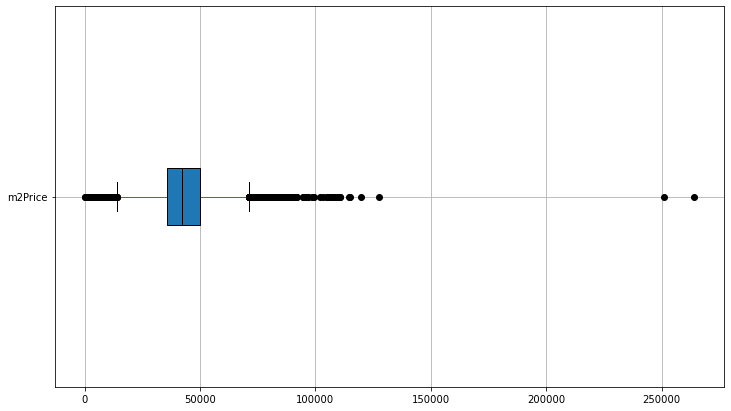

In [5]:
data.boxplot(column = 'm2Price', figsize = (12,7), vert = False, patch_artist = True, 
             boxprops = dict(color = 'black'), medianprops = dict(color = 'black'),
            flierprops = dict(markerfacecolor = 'black'))

plt.savefig(plotName('outlier_box.png'))

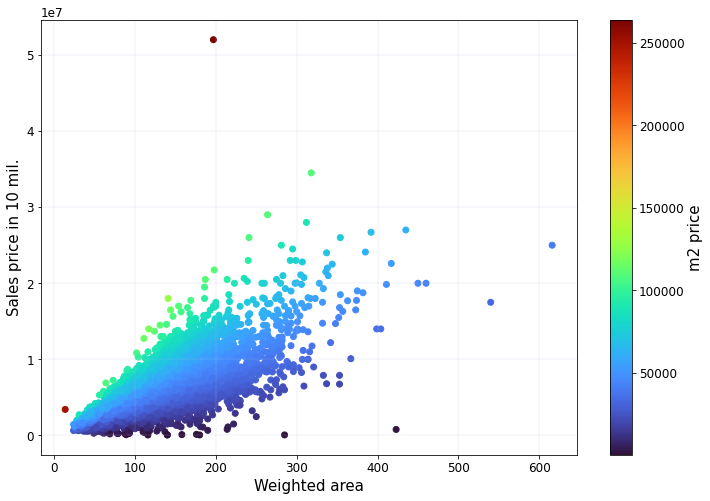

In [347]:
fig, ax = plt.subplots(figsize = (12,8))


ax.set_xlabel('Weighted area', size = 15)
ax.set_ylabel('Sales price in 10 mil.', size = 15)

cbar = plt.colorbar(ax.scatter(x = data['areaWeighted_bd'], y = data['salePrice_b'], 
                               c = data['m2Price'], cmap = plt.get_cmap("turbo")))
cbar.set_label('m2 price', size = 15)

plt.grid(visible = True, color = 'lightsteelblue', linewidth = 0.2)

plt.show()
fig.savefig(plotName('area_price_scatter.png'))

In [7]:
median = data['m2Price'].median()
sigma = data['m2Price'].std()

print(median)
print(sigma)

42168.67469879518
11301.961644803532


In [8]:
outliers = data.loc[(data['m2Price'] > median + 6 * sigma) | (data['m2Price'] < median - 3 * sigma),:]
data = data.loc[(data['m2Price'] <= median + 6 * sigma) & (data['m2Price'] >= median - 3 * sigma),:]

print(len(outliers), " outliers")

51  outliers


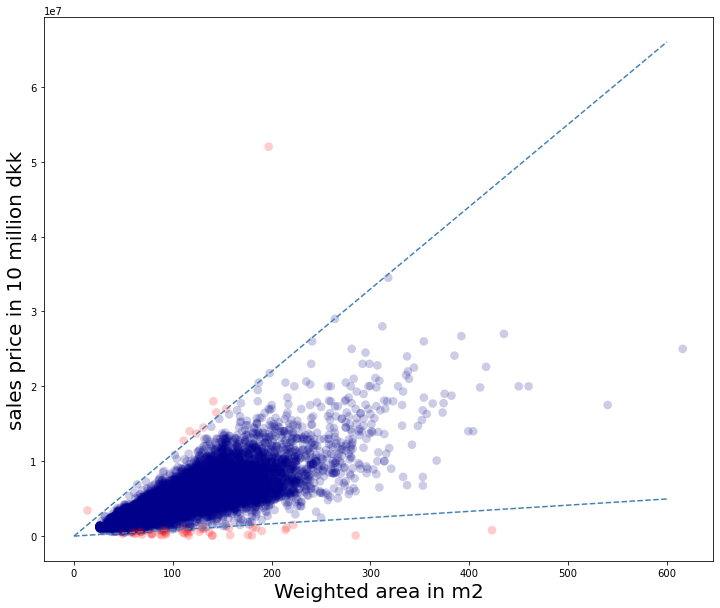

In [20]:
fig, ax = plt.subplots(figsize = (12,10))

# Plot data
plt.scatter(data['areaWeighted_bd'], data['salePrice_b'], 
            edgecolors='none', alpha=0.2, c ='darkblue', s = 75)
plt.scatter(outliers['areaWeighted_bd'], outliers['salePrice_b'], 
            edgecolors='none', alpha=0.2, c ='red', s = 75)

x = np.array([0, 100, 200, 300, 400, 500, 600])
plt.plot(x, (median + 6*sigma)*x, '--', c ='steelblue')
plt.plot(x, (median - 3*sigma)*x, '--', c ='steelblue')

plt.rc('axes', labelsize=20)

# Change fontsize
#plt.rcParams['font.size'] = 18
plt.xlabel('Weighted area in m2')
plt.ylabel('sales price in 10 million dkk')

fig.savefig(plotName('outlierplot.png'), bbox_inches = "tight", dpi = 300)

## Categorical variables

In [351]:
#data.loc[:, ['m2Price','city_b']].value_counts()

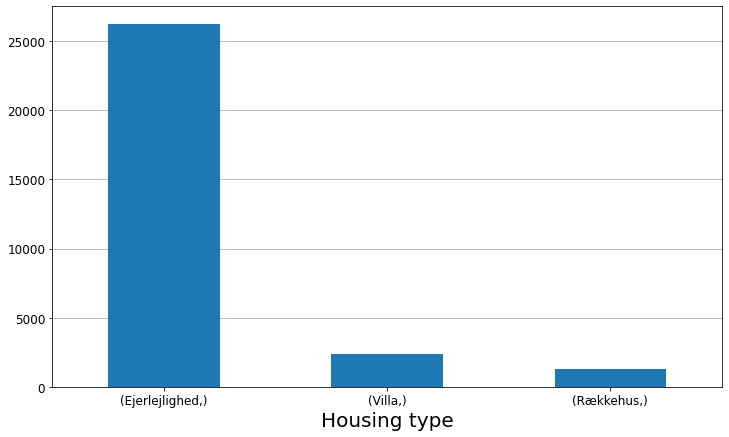

In [352]:
data.loc[:, ['itemTypeName_b']].value_counts().plot.bar(zorder = 3, rot = 0)
plt.grid(visible = True, axis = 'y', zorder = 0)
plt.xlabel('Housing type')

plt.savefig(plotName('cat_houseType.png'))



In [11]:
#print(data.loc[:, ['kitchen.content_d']].value_counts())
print(data.loc[:, ['kitchen.content_d']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
                            &      0 \\
kitchen.content\_d &        \\
\midrule
Eget køkken med afløb &  29834 \\
Fast kogeinstallation i værelse eller på gang &     36 \\
Adgang til fælles køkken &     12 \\
Ingen fast kogeinstallation &      8 \\
\bottomrule
\end{tabular}



In [12]:
data = data[~(data['kitchen.content_d'] == 'Fast kogeinstallation i værelse eller på gang')]
data = data[~(data['kitchen.content_d'] == 'Adgang til fælles køkken')]
data = data[~(data['kitchen.content_d'] == 'Ingen fast kogeinstallation')]
data.drop(['kitchen.content_d'], axis=1, inplace=True)
data.shape

(29834, 66)

In [13]:
print(data.loc[:, ['city_b']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
        &     0 \\
city\_b &       \\
\midrule
København S &  6983 \\
København Ø &  3742 \\
Frederiksberg &  3226 \\
Valby &  2406 \\
København N &  2148 \\
Vanløse &  1728 \\
København V &  1651 \\
Frederiksberg C &  1525 \\
København K &  1509 \\
København NV &  1505 \\
København SV &  1488 \\
Brønshøj &  1455 \\
Hellerup &   239 \\
Nordhavn &   221 \\
Kastrup &     6 \\
Rødovre &     2 \\
\bottomrule
\end{tabular}



In [14]:
print(data.loc[:, ['electionArea_d']].value_counts().head(7).to_latex(index = True))
print(data.loc[:, ['electionArea_d']].value_counts().tail(7).to_latex(index = True))

\begin{tabular}{lr}
\toprule
                  &     0 \\
electionArea\_d &       \\
\midrule
2. Syd &  1185 \\
4. Nord &  1097 \\
9. Sydhavn &  1027 \\
4. Øst &   951 \\
1. Øst &   916 \\
2. Vest &   904 \\
10. Kreds, Duevej &   830 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
        &    0 \\
electionArea\_d &      \\
\midrule
6. Nord &  168 \\
8. Sydøst &  156 \\
5. Vest &  116 \\
9. Midt &  107 \\
5. Nørrebro &   95 \\
6. Øst &   87 \\
6. Vest &   54 \\
\bottomrule
\end{tabular}



In [15]:
pd.crosstab(data['electionArea_d'], data['city_b'],
                  margins = False)#.to_latex(index=True)

city_b                   Brønshøj  Frederiksberg  Frederiksberg C  Hellerup  \
electionArea_d                                                                
1. Nord                         0              0                0       115   
1. Nordvest                     0              0                0       104   
1. Syd                          0              0                0         0   
1. Vest                         0              0                0         0   
1. Øst                          0              0                0         0   
1. Østerbro                     0              0                0         0   
10. Kreds, Bülowsvej            0            256              407         0   
10. Kreds, Duevej               0            830                0         0   
10. Kreds, Ny Hollænder         0             39              616         0   
10. Kreds, Søerne               0              0              502         0   
11. Kreds, Lindevang            0            552                0         0   
11. Kreds, Nyelandsvej          0            534                0         0   
11. Kreds, Rådhuset             0            514                0         0   
11. Kreds, Søndermark           0            501                0         0   
2. Nord                         0              0                0         0   
2. Sundbyvester                 0              0                0         0   
2. Syd                          0              0                0         0   
2. Vest                         0              0                0         0   
2. Øst                          0              0                0         0   
3. Indre By                     0              0                0         0   
3. Nord                         0              0                0         0   
3. Syd                          0              0                0         0   
3. Øst                          0              0                0         0   
4. Nord                         0              0                0         0   
4. Sundbyøster                  0              0                0         0   
4. Syd                          0              0                0         0   
4. Øst                          0              0                0         0   
5. Nord                         0              0                0         0   
5. Nordvest                     0              0                0         0   
5. Nørrebro                     0              0                0         0   
5. Nørrebrohallen               0              0                0         0   
5. Syd                          0              0                0         0   
5. Vest                         0              0                0         0   
5. Øst                          0              0                0         0   
6. Bispebjerg                   0              0                0         0   
6. Nord                         0              0                0         0   
6. Syd                          0              0                0         0   
6. Vest                         0              0                0         0   
6. Øst                          0              0                0        20   
7. Brønshøj                   244              0                0         0   
7. Katrinedal                   0              0                0         0   
7. Kirkebjerg                  15              0                0         0   
7. Nordvest                   445              0                0         0   
7. Syd                          0              0                0         0   
7. Vanløse                      0              0                0         0   
7. Vest                       333              0                0         0   
7. Øst                        418              0                0         0   
8. Midt                         0              0                0         0   
8. Nord                         0              0  

In [16]:
data.drop(['electionArea_d'], axis = 1, inplace=True)
data.shape

(29834, 65)

In [17]:
data = data[~((data['city_b'] == 'Kastrup') |  (data['city_b'] == 'Rødovre'))]

print(data.loc[:, ['city_b']].value_counts())

city_b         
København S        6983
København Ø        3742
Frederiksberg      3226
Valby              2406
København N        2148
Vanløse            1728
København V        1651
Frederiksberg C    1525
København K        1509
København NV       1505
København SV       1488
Brønshøj           1455
Hellerup            239
Nordhavn            221
dtype: int64


In [18]:
data.drop(['postalId_b'], axis = 1, inplace=True)

In [19]:
#print(data.loc[:, ['outerwall_d']].value_counts())
print(data.loc[:, ['outerwall_d']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
     &      0 \\
outerwall\_d &        \\
\midrule
Mursten &  25669 \\
Betonelementer &   2285 \\
Andet materiale &    899 \\
Metal &    277 \\
Letbetonsten &    233 \\
Fibercement herunder asbest &    146 \\
Fibercement uden asbest &    144 \\
Træ &     75 \\
Bindingsværk &     53 \\
Glas &     45 \\
\bottomrule
\end{tabular}



In [21]:
data['outerwall_d'] = data['outerwall_d'].str.replace('Metal', 'Andet materiale')
data['outerwall_d'] = data['outerwall_d'].str.replace('Letbetonsten', 'Andet materiale')
data['outerwall_d'] = data['outerwall_d'].str.replace('Fibercement herunder asbest', 'Andet materiale')
data['outerwall_d'] = data['outerwall_d'].str.replace('Fibercement uden asbest', 'Andet materiale')
data['outerwall_d'] = data['outerwall_d'].str.replace('Træ', 'Andet materiale')
data['outerwall_d'] = data['outerwall_d'].str.replace('Bindingsværk', 'Andet materiale')
data['outerwall_d'] = data['outerwall_d'].str.replace('Glas', 'Andet materiale')
#print(data.loc[:, ['outerwall_d']].value_counts())
print(data.loc[:, ['outerwall_d']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
                &      0 \\
outerwall\_d &        \\
\midrule
Mursten &  25669 \\
Betonelementer &   2285 \\
Andet materiale &   1872 \\
\bottomrule
\end{tabular}



In [22]:
print(data.loc[:, ['roof_d']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
        &      0 \\
roof\_d &        \\
\midrule
Tegl &  10600 \\
Fibercement herunder asbest &   6802 \\
Tagpap med lille hældning &   4698 \\
Tagpap med stor hældning &   4336 \\
Andet materiale &   1871 \\
Betontagsten &    490 \\
Metal &    439 \\
Fibercement uden asbest &    388 \\
Levende tage &    179 \\
Glas &     22 \\
Stråtag &      1 \\
\bottomrule
\end{tabular}



In [23]:
data['roof_d'] = data['roof_d'].str.replace('Betontagsten', 'Andet materiale')
data['roof_d'] = data['roof_d'].str.replace('Metal', 'Andet materiale')
data['roof_d'] = data['roof_d'].str.replace('Fibercement uden asbest', 'Andet materiale')
data['roof_d'] = data['roof_d'].str.replace('Levende tage', 'Andet materiale')
data['roof_d'] = data['roof_d'].str.replace('Glas', 'Andet materiale')
data['roof_d'] = data['roof_d'].str.replace('Stråtag', 'Andet materiale')

print(data.loc[:, ['roof_d']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
                &      0 \\
roof\_d &        \\
\midrule
Tegl &  10600 \\
Fibercement herunder asbest &   6802 \\
Tagpap med lille hældning &   4698 \\
Tagpap med stor hældning &   4336 \\
Andet materiale &   3390 \\
\bottomrule
\end{tabular}



In [24]:
print(data.loc[:, ['heating_d']].value_counts().to_latex(index = True))

\begin{tabular}{lr}
\toprule
            &      0 \\
heating\_d &        \\
\midrule
Fjernvarme/blokvarme &  29517 \\
Elvarme &    172 \\
Centralvarme med én fyringsenhed &     74 \\
Ovn til fast og flydende brændsel &     28 \\
Varmepumpe &     18 \\
Blandet &     15 \\
Centralvarme med to fyringsenheder &      1 \\
Gasradiator &      1 \\
\bottomrule
\end{tabular}



In [25]:
data = data[~(data['heating_d'] =='Centralvarme med én fyringsenhed')]
data = data[~(data['heating_d'] =='Ovn til fast og flydende brændsel')]
data = data[~(data['heating_d'] =='Varmepumpe')]
data = data[~(data['heating_d'] =='Blandet')]
data = data[~(data['heating_d'] =='Centralvarme med to fyringsenheder')]
data = data[~(data['heating_d'] =='Gasradiator')]

data.drop(['heating_d'], axis=1, inplace=True)
data.shape


(29689, 63)

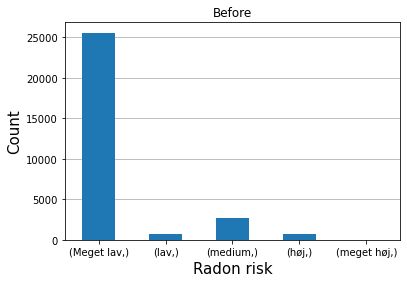

In [26]:
pd.DataFrame(data.loc[:, ['radonRisk_d']].value_counts(
        sort = False)[['Meget lav', 'lav', 'medium', 'høj', 'meget høj']]).plot.bar(legend = False, 
                                                                                    zorder = 3, 
                                                                                    rot = 0)
plt.grid(visible = True, axis = 'y', zorder = 0)
plt.xlabel('Radon risk', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Before')

plt.savefig(plotName('radonRiskBefore.png'))

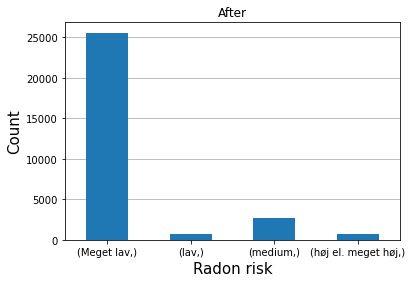

In [27]:
data['radonRisk_d'] = data['radonRisk_d'].str.replace('meget høj', 'høj')
data['radonRisk_d'] = data['radonRisk_d'].str.replace('høj', 'høj el. meget høj')

pd.DataFrame(data.loc[:, ['radonRisk_d']].value_counts(sort = False)[['Meget lav', 'lav', 'medium', 'høj el. meget høj']]
            ).plot.bar(legend = False, zorder = 3, rot = 0)
plt.grid(visible = True, axis = 'y', zorder = 0)
plt.xlabel('Radon risk', size = 15)
plt.ylabel('Count', size = 15)
plt.title('After')

plt.savefig(plotName('radonRiskAfter.png'))


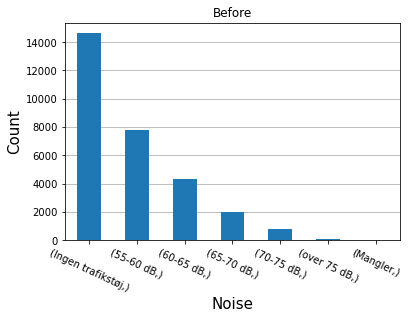

In [28]:
data.loc[:, ['noise_d']].value_counts().plot.bar(legend = False, zorder = 3, rot = -25)
plt.grid(visible = True, axis = 'y', zorder = 0)
plt.xlabel('Noise', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Before')

plt.savefig(plotName('noiseBefore.png'))

29650 observationer



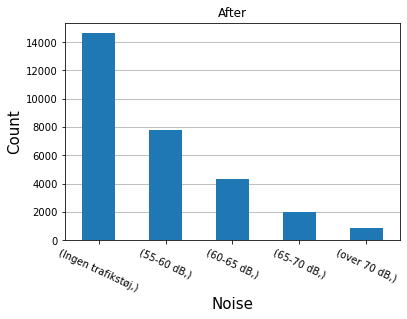

In [29]:
data['noise_d'] = data['noise_d'].str.replace('over 75 dB', '70-75 dB')
data['noise_d'] = data['noise_d'].str.replace('70-75 dB', 'over 70 dB')

data = data[~(data['noise_d'] == 'Mangler')]

print(len(data), 'observationer')
print()
data.loc[:, ['noise_d']].value_counts().plot.bar(legend = False, zorder = 3, rot = -25)
plt.grid(visible = True, axis = 'y', zorder = 0)
plt.xlabel('Noise', size = 15)
plt.ylabel('Count', size = 15)
plt.title('After')

plt.savefig(plotName('noiseAfter'))


In [30]:
print(data.loc[:, ['floodingRisk_d']].value_counts())

floodingRisk_d 
kan være risiko    26134
er høj risiko       2975
er lav risiko        541
dtype: int64


In [31]:
print(data.loc[:, ['biggestParty_d']].value_counts())

biggestParty_d   
socialdemokratiet    10222
enhedslisten          7503
venstre               7204
radikale              4721
dtype: int64


In [32]:
print(data.loc[:, ['unitUsage_d']].value_counts())

unitUsage_d                                                          
Bolig i etageejendom, flerfamiliehus eller to-familiehus                 25702
Fritliggende enfamiliehus                                                 2356
Række-, kæde- og klyngehus                                                1066
Dobbelthus                                                                 326
Række-, kæde- eller dobbelthus (lodret adskillelse mellem enhederne).      195
0                                                                            5
dtype: int64


In [33]:
data = data[~(data['unitUsage_d'] == '0')]
print(data.loc[:, ['unitUsage_d']].value_counts())

unitUsage_d                                                          
Bolig i etageejendom, flerfamiliehus eller to-familiehus                 25702
Fritliggende enfamiliehus                                                 2356
Række-, kæde- og klyngehus                                                1066
Dobbelthus                                                                 326
Række-, kæde- eller dobbelthus (lodret adskillelse mellem enhederne).      195
dtype: int64


In [34]:
data.head()

address_b                    street_b  \
0        Birkegade 15B, 3. th, 2200 København N        Birkegade 15B, 3. th   
1  Julius Bloms Gade 4, 1. th, 2200 København N  Julius Bloms Gade 4, 1. th   
2  Julius Bloms Gade 4, 5. tv, 2200 København N  Julius Bloms Gade 4, 5. tv   
3      Sundholmsvej 25, 1. tv, 2300 København S      Sundholmsvej 25, 1. tv   
4      Sundholmsvej 25, 4. tv, 2300 København S      Sundholmsvej 25, 4. tv   

        streetName_b       city_b valuationDate_b  propertyValuation_b  \
0          Birkegade  København N      2021-10-01            1350000.0   
1  Julius Bloms Gade  København N      2021-10-01            2600000.0   
2  Julius Bloms Gade  København N      2021-10-01            2400000.0   
3       Sundholmsvej  København S      2021-10-01            1650000.0   
4       Sundholmsvej  København S      2021-10-01            1650000.0   

   salePrice_b  paymentCash_b  salesYear_b saleDate_b itemTypeName_b  \
0    3698000.0      3698000.0         2021 2021-09-24  Ejerlejlighed   
1    2775000.0      5695000.0         2021 2021-04-19  Ejerlejlighed   
2    5025000.0      5099000.0         2020 2020-03-11  Ejerlejlighed   
3    2695000.0      2695000.0         2017 2017-08-04  Ejerlejlighed   
4    2800000.0      2850000.0         2017 2017-11-13  Ejerlejlighed   

   buildYear_b  areaResidential_b  areaParcel_b  numberOfFloors_b  floor_b  \
0         1892               56.0           0.0               1.0      3.0   
1         1908              133.0           0.0               1.0      1.0   
2         1908              121.0           0.0               0.0      5.0   
3         1914               77.0           0.0               0.0      1.0   
4         1914               77.0           0.0               1.0      4.0   

  energyMark_b  SalesPeriod_b  numberOfToilets_b  numberOfBathrooms_b  \
0            c           85.0                1.0                  1.0   
1            d           49.0                1.0                  1.0   
2            d          148.0                1.0                  1.0   
3            d           19.0                1.0                  1.0   
4            d           84.0                1.0                  1.0   

   latitude_b  longitude_b  breakinRisk_b  rebuildYear_bd  area_bd  \
0   55.690278    12.557528            2.0            1892     56.0   
1   55.693437    12.546878            2.0            1908    133.0   
2   55.693437    12.546878            2.0            1908    121.0   
3   55.662372    12.596224            2.0            1914     77.0   
4   55.662372    12.596224            2.0            1914     77.0   

   areaBasement_bd  areaWeighted_bd  numberOfRooms_bd  \
0              0.0             56.0               2.0   
1              0.0            133.0               4.0   
2              0.0            121.0               4.0   
3              0.0             77.0               3.0   
4              0.0             77.0               3.0   

                                                unitUsage_d  AVM_price_d  \
0  Bolig i etageejendom, flerfamiliehus eller to-familiehus    3698000.0   
1  Bolig i etageejendom, flerfamiliehus eller to-familiehus    2718186.0   
2  Bolig i etageejendom, flerfamiliehus eller to-familiehus    5784274.0   
3  Bolig i etageejendom, flerfamiliehus eller to-familiehus    3505033.0   
4  Bolig i etageejendom, flerfamiliehus eller to-familiehus    3503096.0   

  outerwall_d                       roof_d radonRisk_d           noise_d  \
0     Mursten  Fibercement herunder asbest   Meget lav  Ingen trafikstøj   
1     Mursten  Fibercement herunder asbest   Meget lav          55-60 dB   
2     Mursten  Fibercement herunder asbest   Meget lav          55-60 dB   
3     Mursten                         Tegl   Meget lav          55-60 dB   
4     Mursten                         Tegl   Meget lav          55-60 dB   

    floodingRisk_d  aboveSea_d biggestParty_d  turnoutVote_d  school_h  \
0  kan være risiko       

##  Numerical variables

In [35]:
data[data['buildYear_b'] == 1200]

address_b  \
3205    Willy Brandts Vej 19, 2. th, 2450 København SV   
5254    Amager Strandvej 114C, 5. th, 2300 København S   
14327       Strandlodsvej 13C, 2. tv, 2300 København S   
15369       Strandlodsvej 13B, 5. tv, 2300 København S   
21511       Strandlodsvej 13A, 2. tv, 2300 København S   
22648  Amager Strandvej 114C, 13. mf, 2300 København S   
22710   Amager Strandvej 112L, 1. th, 2300 København S   

                            street_b       streetName_b        city_b  \
3205     Willy Brandts Vej 19, 2. th  Willy Brandts Vej  København SV   
5254    Amager Strandvej 114C, 5. th   Amager Strandvej   København S   
14327       Strandlodsvej 13C, 2. tv      Strandlodsvej   København S   
15369       Strandlodsvej 13B, 5. tv      Strandlodsvej   København S   
21511       Strandlodsvej 13A, 2. tv      Strandlodsvej   København S   
22648  Amager Strandvej 114C, 13. mf   Amager Strandvej   København S   
22710   Amager Strandvej 112L, 1. th   Amager Strandvej   København S   

      valuationDate_b  propertyValuation_b  salePrice_b  paymentCash_b  \
3205       2021-10-01            1150000.0    3498000.0      3498000.0   
5254       2021-10-01            2850000.0    7700000.0      7795000.0   
14327      2021-10-01            2900000.0    4670000.0      4695000.0   
15369      2021-10-01            2050000.0    4050000.0      4095000.0   
21511      2021-10-01            1950000.0    4720000.0      4695000.0   
22648      2021-10-01            1950000.0    6700000.0      6795000.0   
22710      2021-10-01            2750000.0    6775000.0      6995000.0   

       salesYear_b saleDate_b itemTypeName_b  buildYear_b  areaResidential_b  \
3205          2021 2021-04-14  Ejerlejlighed         1200               59.0   
5254          2021 2021-07-04  Ejerlejlighed         1200              123.0   
14327         2019 2019-10-01  Ejerlejlighed         1200              126.0   
15369         2019 2019-08-18  Ejerlejlighed         1200               90.0   
21511         2021 2021-09-24  Ejerlejlighed         1200               87.0   
22648         2021 2021-02-03  Ejerlejlighed         1200               85.0   
22710         2021 2021-02-04  Ejerlejlighed         1200              133.0   

       areaParcel_b  numberOfFloors_b  floor_b energyMark_b  SalesPeriod_b  \
3205            0.0               1.0      2.0        a2015           34.0   
5254            0.0               1.0      5.0        a2015          146.0   
14327           0.0               1.0      2.0        a2015          122.0   
15369           0.0               1.0      5.0        a2015           20.0   
21511           0.0               1.0      2.0        a2015           11.0   
22648           0.0               1.0     13.0        a2015            8.0   
22710           0.0               0.0      1.0        a2015          129.0   

       numberOfToilets_b  numberOfBathrooms_b  latitude_b  longitude_b  \
3205                 1.0                  1.0   55.656746    12.561426   
5254                 2.0                  2.0   55.660036    12.631647   
14327                1.0                  1.0   55.665448    12.621808   
15369                1.0                  1.0   55.665376    12.621961   
21511                1.0                  1.0   55.665495    12.621861   
22648                1.0                  1.0   55.660036    12.631647   
22710                2.0                  2.0   55.660004    12.632726   

       breakinRisk_b  rebuildYear_bd  area_bd  areaBasement_bd  \
3205             2.0            1200     59.0              0.0   
5254             2.0            1200    123.0              0.0   
14327            2.0            1200    126.0              0.0   
15369            2.0            1200     90.0              0.0   
21511            2.0            1200     87.0              0.0   
22648            2.0            1200     85.0              0.0   
22710            2.0            1200    133.0              0.0   

       areaWei

In [36]:
numerics = data.select_dtypes(include=['float64', 'int64'])
numerics = numerics.drop(columns = ['AVM_price_d', 'm2Price'])

pd.options.display.float_format = "{:,.2f}".format
print(numerics.drop(columns = ['latitude_b', 'longitude_b', 'salesYear_b']).describe().T[['mean', 'min', 'max']].to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &         mean &        min &           max \\
\midrule
propertyValuation\_b & 1,919,000.46 &       0.00 & 94,000,000.00 \\
salePrice\_b         & 4,020,052.10 & 450,000.00 & 34,500,000.00 \\
paymentCash\_b       & 4,078,335.89 & 250,000.00 & 32,500,000.00 \\
buildYear\_b         &     1,942.82 &   1,200.00 &      2,024.00 \\
areaResidential\_b   &        89.28 &      22.00 &        616.00 \\
areaParcel\_b        &        64.98 &       0.00 &        999.00 \\
numberOfFloors\_b    &         1.12 &       0.00 &         15.00 \\
floor\_b             &         1.95 &      -1.00 &         15.00 \\
SalesPeriod\_b       &        81.98 &       0.00 &        993.00 \\
numberOfToilets\_b   &         1.17 &       0.00 &         22.00 \\
numberOfBathrooms\_b &         1.08 &       0.00 &          6.00 \\
breakinRisk\_b       &         2.00 &       2.00 &          2.00 \\
rebuildYear\_bd      &     1,951.65 &   1,200.00 &      2,024.00 \\
area\_bd             &    

In [37]:
data = data[~(data['buildYear_b'] == 1200)]
data = data[~(data['buildYear_b'] > 2021)]

data = data[~(data['numberOfRooms_bd'] == 0)]

data = data[~(data['numberOfToilets_b'] < 0)]
data = data[~(data['numberOfToilets_b'] == 22)]

data.drop(columns = ['breakinRisk_b'], inplace = True)

numerics = data.select_dtypes(include=['float64', 'int64'])
numerics = numerics.drop(columns = ['AVM_price_d', 'm2Price'])

print(numerics.drop(columns = ['latitude_b', 'longitude_b', 'salesYear_b']).describe().T[['mean', 'min', 'max']])

                            mean        min           max
propertyValuation_b 1,919,011.16       0.00 94,000,000.00
salePrice_b         4,019,843.24 450,000.00 34,500,000.00
paymentCash_b       4,078,094.33 250,000.00 32,500,000.00
buildYear_b             1,942.98   1,624.00      2,021.00
areaResidential_b          89.28      22.00        616.00
areaParcel_b               65.01       0.00        999.00
numberOfFloors_b            1.12       0.00         15.00
floor_b                     1.95      -1.00         15.00
SalesPeriod_b              81.98       0.00        993.00
numberOfToilets_b           1.17       0.00          5.00
numberOfBathrooms_b         1.08       0.00          6.00
rebuildYear_bd          1,951.81   1,624.00      2,021.00
area_bd                    89.28      22.00        616.00
areaBasement_bd             6.45       0.00        893.00
areaWeighted_bd            91.79      26.00        616.00
numberOfRooms_bd            3.12       1.00         12.00
aboveSea_d    

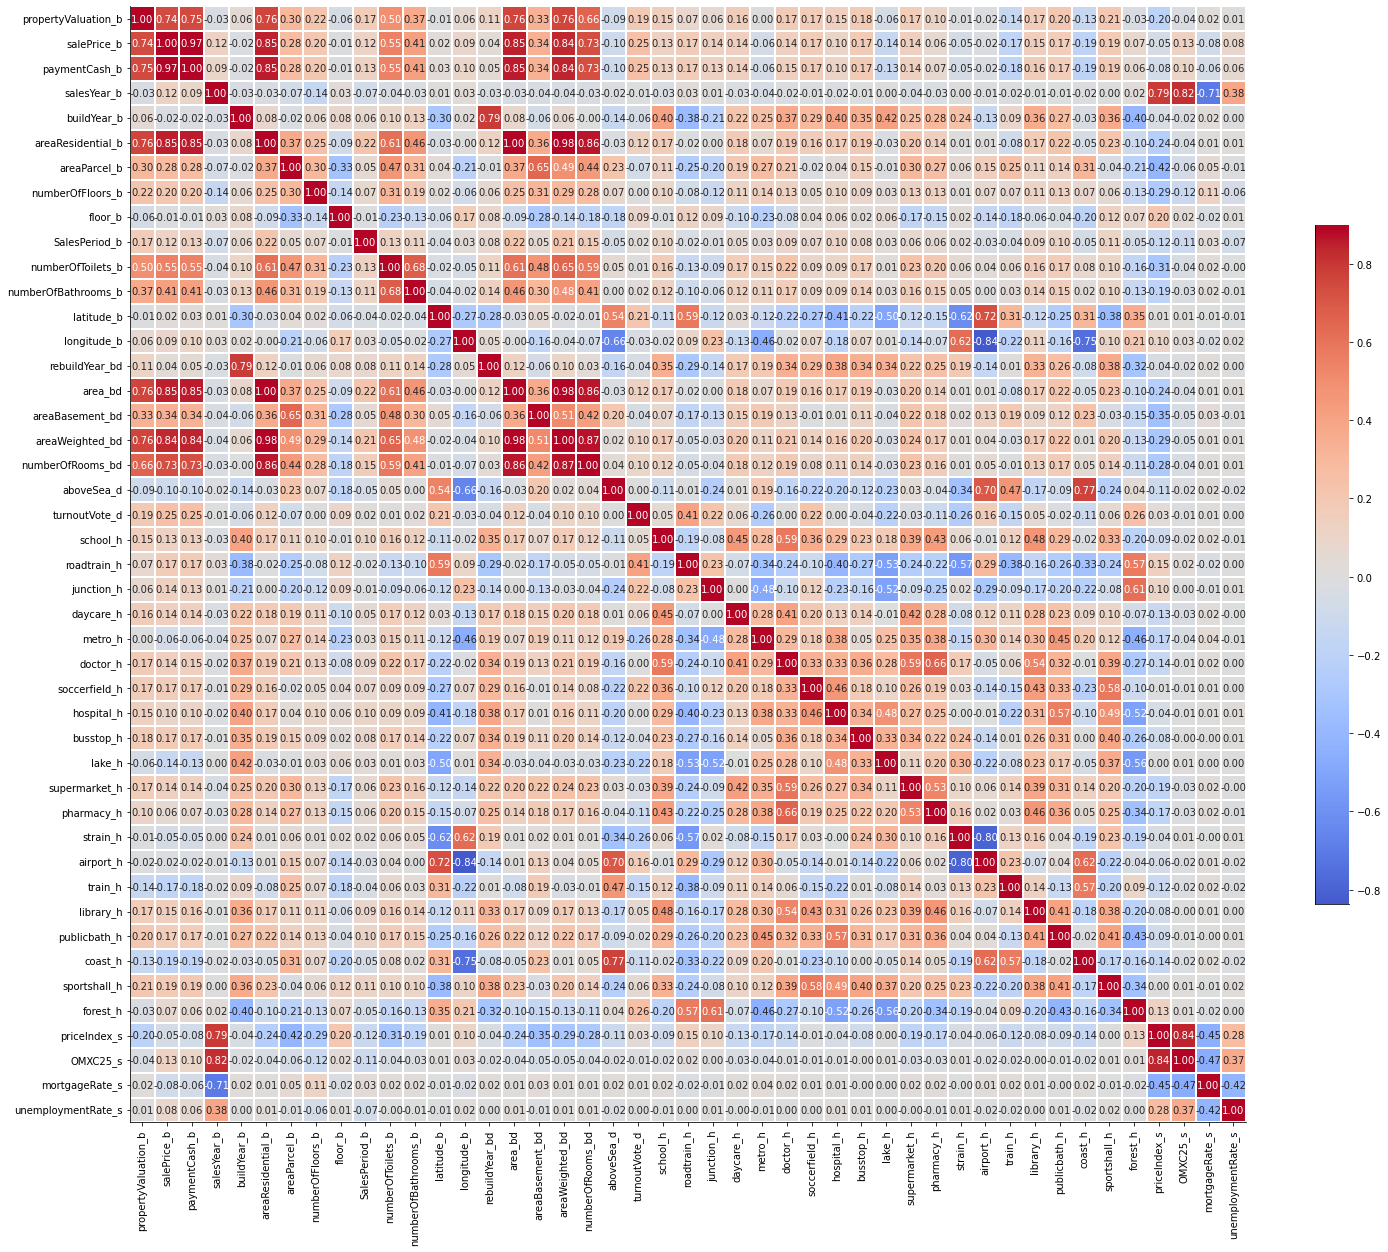

In [38]:
cm = numerics.corr(method='pearson')
hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
hm.figure.set_size_inches(25,25)
plt.show()

hm.figure.savefig(plotName('corrFull.png'), bbox_inches = "tight", dpi = 300)

In [39]:
corr_num_list = (cm.where(np.triu(np.ones(cm.shape), k=1).astype(np.bool))
                      .stack().sort_values(ascending=False))
corr_num_list.head(55)

/var/folders/2t/qd3vvq4x70ld673ffm69bc6h0000gn/T/ipykernel_13868/675974032.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_num_list = (cm.where(np.triu(np.ones(cm.shape), k=1).astype(np.bool))


areaResidential_b    area_bd               1.00
                     areaWeighted_bd       0.98
area_bd              areaWeighted_bd       0.98
salePrice_b          paymentCash_b         0.97
areaWeighted_bd      numberOfRooms_bd      0.87
areaResidential_b    numberOfRooms_bd      0.86
area_bd              numberOfRooms_bd      0.86
paymentCash_b        areaResidential_b     0.85
                     area_bd               0.85
salePrice_b          areaResidential_b     0.85
                     area_bd               0.85
priceIndex_s         OMXC25_s              0.84
paymentCash_b        areaWeighted_bd       0.84
salePrice_b          areaWeighted_bd       0.84
salesYear_b          OMXC25_s              0.82
buildYear_b          rebuildYear_bd        0.79
salesYear_b          priceIndex_s          0.79
aboveSea_d           coast_h               0.77
propertyValuation_b  area_bd               0.76
                     areaResidential_b     0.76
                     areaWeighted_bd    

In [40]:
corr_num_list.tail(20)

areaParcel_b    priceIndex_s         -0.42
mortgageRate_s  unemploymentRate_s   -0.42
publicbath_h    forest_h             -0.43
priceIndex_s    mortgageRate_s       -0.45
metro_h         forest_h             -0.46
longitude_b     metro_h              -0.46
OMXC25_s        mortgageRate_s       -0.47
junction_h      metro_h              -0.48
latitude_b      lake_h               -0.50
hospital_h      forest_h             -0.52
junction_h      lake_h               -0.52
roadtrain_h     lake_h               -0.53
lake_h          forest_h             -0.56
roadtrain_h     strain_h             -0.57
latitude_b      strain_h             -0.62
longitude_b     aboveSea_d           -0.66
salesYear_b     mortgageRate_s       -0.71
longitude_b     coast_h              -0.75
strain_h        airport_h            -0.80
longitude_b     airport_h            -0.84
dtype: float64

In [41]:
numerics.corrwith(numerics['salePrice_b']).sort_values(ascending=False)

salePrice_b            1.00
paymentCash_b          0.97
areaResidential_b      0.85
area_bd                0.85
areaWeighted_bd        0.84
propertyValuation_b    0.74
numberOfRooms_bd       0.73
numberOfToilets_b      0.55
numberOfBathrooms_b    0.41
areaBasement_bd        0.34
areaParcel_b           0.28
turnoutVote_d          0.25
numberOfFloors_b       0.20
sportshall_h           0.19
busstop_h              0.17
soccerfield_h          0.17
roadtrain_h            0.17
publicbath_h           0.17
library_h              0.15
doctor_h               0.14
daycare_h              0.14
supermarket_h          0.14
junction_h             0.14
school_h               0.13
OMXC25_s               0.13
salesYear_b            0.12
SalesPeriod_b          0.12
hospital_h             0.10
longitude_b            0.09
unemploymentRate_s     0.08
forest_h               0.07
pharmacy_h             0.06
rebuildYear_bd         0.04
latitude_b             0.02
floor_b               -0.01
airport_h           

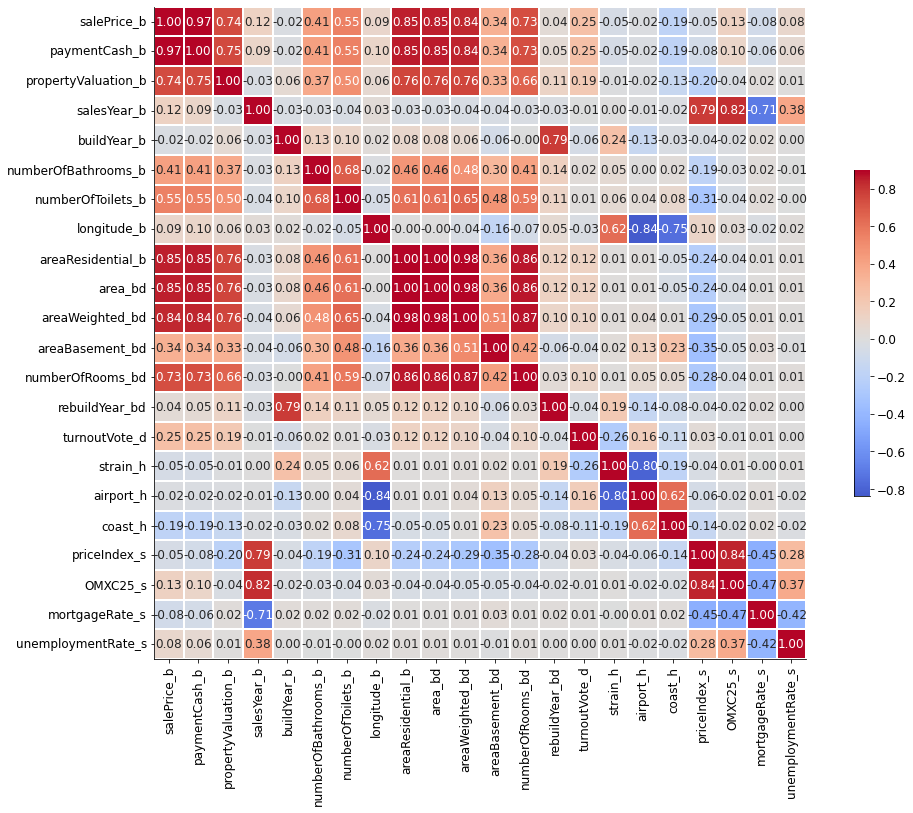

In [42]:
most_corr = ['salePrice_b', 'paymentCash_b', 'propertyValuation_b', 'salesYear_b',
       'buildYear_b', 'numberOfBathrooms_b', 'numberOfToilets_b', 'longitude_b',
       'areaResidential_b', 'area_bd', 'areaWeighted_bd', 'areaBasement_bd',
       'numberOfRooms_bd', 'rebuildYear_bd', 
       'turnoutVote_d', 'strain_h', 'airport_h', 'coast_h', 
       'priceIndex_s', 'OMXC25_s', 'mortgageRate_s', 'unemploymentRate_s']

plt.rcParams['font.size'] = 12

# Heat map most correlated
cm = numerics[most_corr].corr(method='pearson')

hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()

hm.figure.set_size_inches(17,12)
plt.show()

hm.figure.savefig(plotName('corrSmall.png'), bbox_inches = "tight", dpi = 300)

In [43]:
data.drop(['areaResidential_b', 'area_bd'], axis = 1, inplace = True)

# House prices and other structures


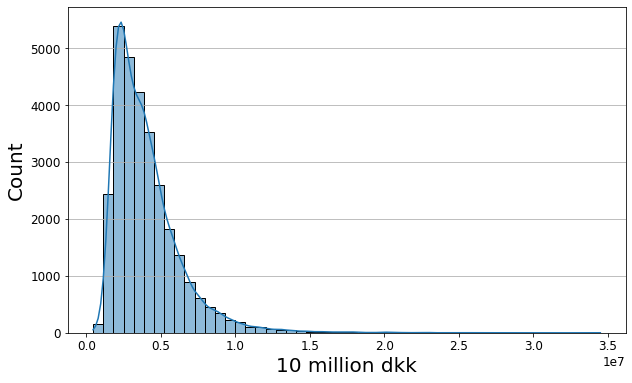

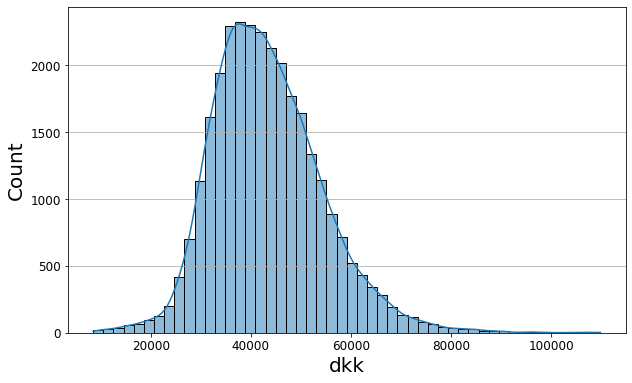

In [45]:
plt.figure(figsize=(10, 6))
#plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.histplot(data=data, x="salePrice_b", kde=True, bins = 50, zorder = 1)
#plt.title('Histogram of sales prices')
plt.xlabel('10 million dkk')
plt.grid(visible = True, axis = 'y', zorder = 0)

plt.savefig(plotName('histogram_prices.png'), bbox_inches = "tight", dpi = 300)
plt.show()

#plt.subplot(1, 2, 2) #index 2
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="m2Price", kde=True, bins = 50, zorder = 1)
#plt.title('Histogram of m2 prices')
plt.xlabel('dkk')
plt.grid(visible = True, axis = 'y', zorder = 0)

plt.savefig(plotName('histogram_m2prices.png'), bbox_inches = "tight", dpi = 300)

In [46]:
max_val = data["salePrice_b"].max()
min_val = data["salePrice_b"].min()
print('min: ', min_val)
print('max: ', max_val)

min:  450000.0
max:  34500000.0


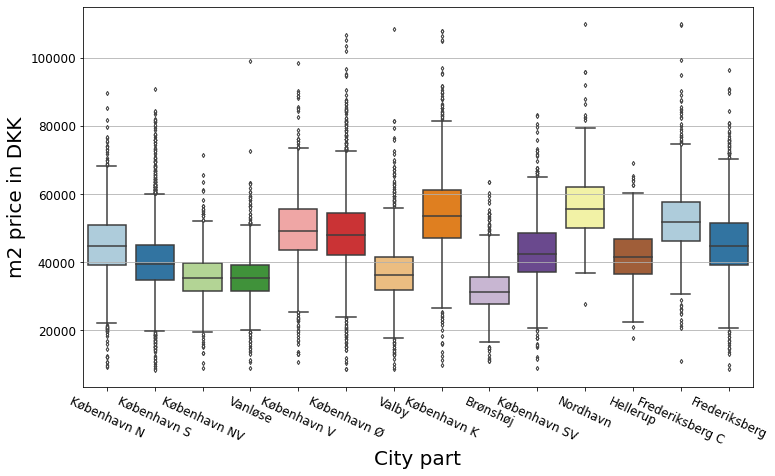

In [47]:
plt.rcParams["figure.figsize"] = (12,7)

#sns.set_theme(style="whitegrid")

flierprops = dict(markerfacecolor='1', markersize=3,
              linestyle='none')

bp = sns.boxplot(x="city_b", y="m2Price", data=data , palette="Paired", flierprops=flierprops, zorder = 3)
plt.xticks(rotation=-25, horizontalalignment='center')
plt.xlabel('City part')
plt.ylabel('m2 price in DKK')
plt.grid(visible = True, axis = 'y', zorder = 0)
plt.show()

bp.figure.savefig(plotName('m2price_citypart.png'), bbox_inches = "tight", dpi = 300)

#### Plotting on a map of Cph

In [48]:
print((data[["longitude_b"]].values.min(),   data[["longitude_b"]].values.max(),      
         data[["latitude_b"]].values.min(),   data[["latitude_b"]].values.max()))

BBox = (12.4538, 12.6396, 55.6163, 55.7314)
print(BBox)

(12.453877175159606, 12.63955937017143, 55.61631318993741, 55.73130518763703)
(12.4538, 12.6396, 55.6163, 55.7314)


In [49]:
cph_map = plt.imread("map.png")

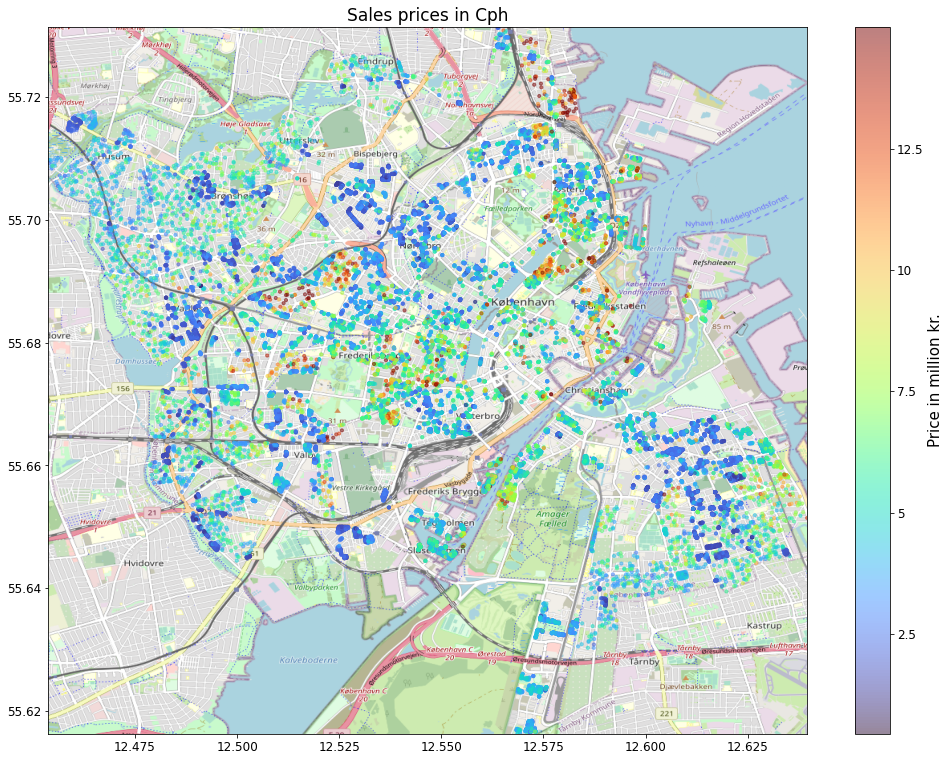

In [50]:
fig, ax = plt.subplots(figsize = (17,13))


pdata = data[["salePrice_b", "longitude_b", 
                           "latitude_b"]]

conversion = pdata['salePrice_b'] / 1000000


ax.set_title('Sales prices in Cph', size = 17)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
cbar = fig.colorbar(ax.scatter(pdata["longitude_b"], pdata["latitude_b"], zorder=1, alpha= 0.5, c=conversion, 
                               cmap = plt.get_cmap("turbo"), vmax = 15, s=10),
                    ticks = [2.5,5,7.5,10, 12.5])

cbar.set_label(label='Price in million kr.',size=15)
cbar.set_ticklabels(["2.5", "5", "7.5", "10", '12.5'])

ax.imshow(cph_map, zorder=0, extent = BBox, aspect= 'auto')
fig.savefig(plotName('cph_map_scatter.png'), bbox_inches = "tight", dpi = 300)

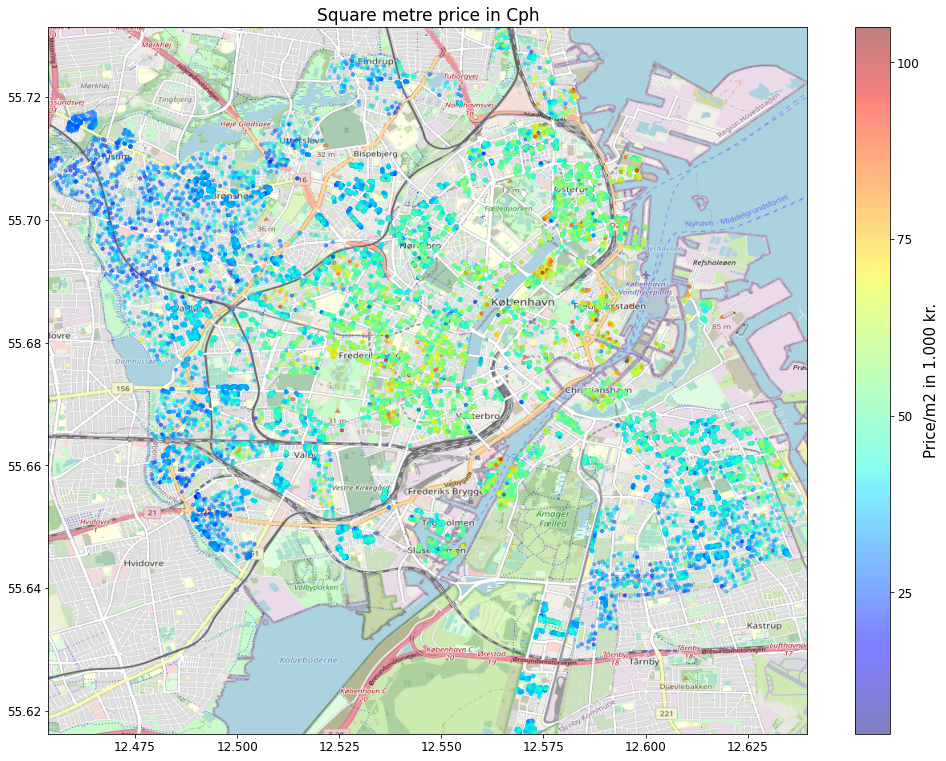

In [51]:
fig, ax = plt.subplots(figsize = (17,13))


conversion = data['salePrice_b'] / data['areaWeighted_bd']

ax.set_title('Square metre price in Cph', size = 17)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
cbar = fig.colorbar(ax.scatter(pdata["longitude_b"], pdata["latitude_b"], zorder=1, alpha= 0.5, c=conversion, 
                               cmap = plt.get_cmap("jet"), vmin = 5000, vmax = 105000, s=10),
                    ticks = [0, 25000, 50000, 75000, 100000]
                   )

cbar.set_label(label='Price/m2 in 1.000 kr.',size=15)
cbar.set_ticklabels([ "0","25", "50", "75","100"])

ax.imshow(cph_map, zorder=0, extent = BBox, aspect= 'auto')

fig.savefig(plotName('cph_map_scatter_m2.png'), bbox_inches = "tight", dpi = 300)

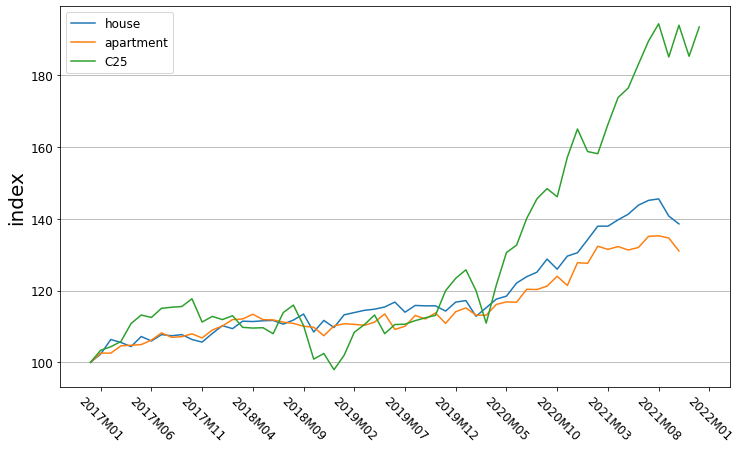

In [52]:
price_index = pd.read_csv('salesPriceIndex.csv', delimiter=',', header=1, skiprows=1)
price_index = price_index.drop([0, 1]).T
price_index = price_index.iloc[4:, :]
price_index.columns = ['house', 'apartment']

price_index['house'] = 100 * price_index['house'] / price_index['house'].values[0]
price_index['apartment'] = 100 * price_index['apartment'] / price_index['apartment'].values[0]

OMXC25 = pd.read_csv('OMXC25.csv', delimiter=',', header=0, skiprows=1).T
OMXC25 = OMXC25.iloc[1:,0]

OMXC25 = 100 * OMXC25 / OMXC25.values[0]

price_index.plot(y = ['house', 'apartment'], kind = 'line', use_index = True, rot = -45, 
                 ylabel = 'index', figsize = (12,7))
axes = plt.gca()
axes.yaxis.grid()

plt.plot(OMXC25.index, OMXC25.values, label ='C25')
plt.legend(loc="upper left")
plt.xticks(['2017M01', '2017M06', '2017M11', '2018M04', '2018M09', '2019M02', '2019M07', '2019M12', 
            '2020M05', '2020M10', '2021M03', '2021M08', '2022M01'])
axes.set_xticklabels(['2017M01', '2017M06', '2017M11', '2018M04', '2018M09', '2019M02', '2019M07', 
                      '2019M12', '2020M05', '2020M10', '2021M03', '2021M08', '2022M01'])


plt.savefig(plotName('salesindex.png'), bbox_inches = "tight", dpi = 300)
plt.show()

In [393]:
data.to_csv('modelling_data.csv', index = False)